<a href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_TEST_LibraryCharacterisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%capture
!pip install xlrd
!pip install --upgrade xlrd
!pip install ConStrain

In [3]:
#!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

# DATA analysis

## used promoters

In [4]:
promoters_df = pd.read_csv('ConStrain_on_google_colab/Data/raw/promoters.csv')
promoters_df


,no_by_pos,position,name,number,sequence_5_to_3,no_name,id,sys_name,length,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,1,1,pCYC1,1,NaN,1_pCYC1,1_pCYC1_1,YJR048W,NaN,2775.830,3742.74000,2459.6600
1,2,1,pENO2,2,NaN,2_pENO2,2_pENO2_2,YHR174W,NaN,2950.220,2527.27000,84.3614
2,3,1,pPCK1,3,NaN,3_pPCK1,3_pPCK1_3,YKR097W,NaN,1948.900,9.80902,4639.4100
3,4,1,pRPL15B,4,NaN,4_pRPL15B,4_pRPL15B_4,YMR121C,NaN,200.212,186.50900,258.0280
4,1,2,pCCW12,5,NaN,5_pCCW12,5_pCCW12_1,YLR110C,NaN,5496.460,6376.54000,2516.0500
5,2,2,pMLS1,6,NaN,6_pMLS1,6_pMLS1_2,YNL117W,NaN,2222.160,8.09464,5267.0000
6,3,2,pTPI1,7,NaN,7_pTPI1,7_pTPI1_3,YDR050C,NaN,2264.780,2853.86000,209.1640
7,4,2,pURE2,8,NaN,8_pURE2,8_pURE2_4,YNL229C,NaN,253.590,344.07600,222.4390


In [5]:
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df

,name,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [6]:
promoters_df.columns = ['name', 6, 12, 24]
promoters_df

,name,6,12,24
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [7]:
promoters_df = promoters_df.set_index('name')


In [8]:
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


In [9]:
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


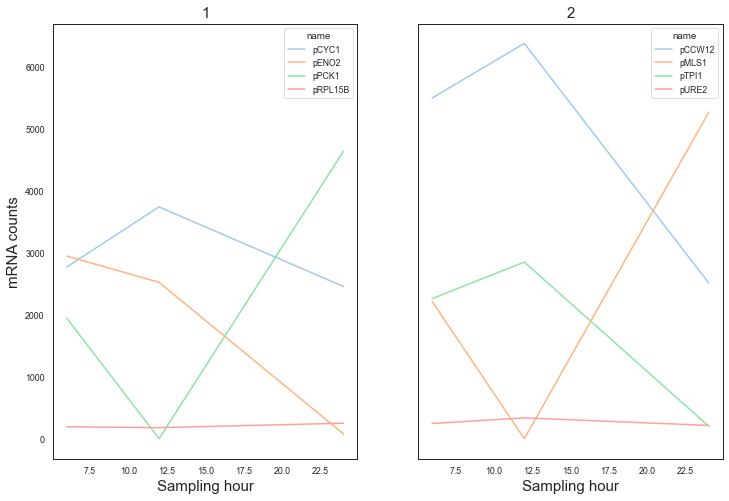

In [10]:
# Plotting an empty subplot

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)
#plt.savefig('Pictures/Dynamics_of_chosen_promoters.png', dpi = 120)

## DATA wrangling

1. In Emacs; Result_table_210330_tmet494_Soren.xlsx to .csv N.D. -> N.A.; N.A. -> NA.
2. Change names to plates names e.g.Result_table_210330_tmet494_Soren.csv -> Result_table_210330_tmet494_yp48Feed-Nofeed.xlsx


In [11]:
#1. In Emacs; Result_table_210330_tmet494_Soren.xlsx to .csv N.D. -> N.A.; N.A. -> NA.
#2. Change names to plates names e.g.Result_table_210330_tmet494_Soren.csv -> Result_table_210330_tmet494_yp48Feed-Nofeed.xlsx

In [13]:
import pandas as pd
import os

results1 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv", sep = ',')
results_merged = results1
results_merged

,Unnamed: 0,data_file,sample_notes,AC Samples,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tetrahydroalstonine,Amt_ug_L_Tryptamine,Amt_ug_L_Tryptophan,Unnamed: 10,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,Amt_uM_Tryptophan
0,0,210330_TMET494_032.xms,96WP988_P1_B2,0_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,8009.517,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,49.99074398,N.A.
1,1,210330_TMET494_033.xms,96WP988_P1_B3,0_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,5817.125,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,36.30710898,N.A.
2,2,210330_TMET494_034.xms,96WP988_P1_B4,0_3_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6003.777,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,37.47208214,N.A.
3,3,210330_TMET494_035.xms,96WP988_P1_B5,1_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6635.864,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,41.41720135,N.A.
4,4,210330_TMET494_036.xms,96WP988_P1_B6,1_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,7046.096,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,43.97763076,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,210330_TMET494_237.xms,96WP989_P2_F11,17_2_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,79827.258,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,498.235289,N.A.
104,104,210330_TMET494_241.xms,96WP989_P2_G2,17_3_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,97553.734,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,608.8736363,N.A.
105,105,210330_TMET494_246.xms,96WP989_P2_G7,15_4_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,623.513,N.D.,113480.148,N.A.,NaN,N.D.,N.D.,N.D.,1.175175754,N.D.,708.2770441,N.A.
106,106,210330_TMET494_247.xms,96WP989_P2_G8,15_5_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,576.808,N.D.,122431.367,N.A.,NaN,N.D.,N.D.,N.D.,1.087147784,N.D.,764.1453439,N.A.


In [14]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results_merged.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)


# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 3:11], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 0:1], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 2:3], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, -1:], inplace = True, axis = 1)

# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

In [15]:
# already did this
#df_filter.to_csv('../data/raw/023_LC-MS/all_results_lcms/Result_table_210330_tmet494_Lucas.csv')

In [16]:
# seperate sample notes into different plates ie. P1, P2, P3: A1, A2... 
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'plate', 'well']
df_filter_plates.iloc[108:, 2:3] = df_filter_plates.iloc[108:, 1:2]
df_filter_plates.iloc[108:, 1:2] = 'P3'

list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

In [17]:
#df_filter[['sample', 'plate', 'well']] = pd.DataFrame([df_filter_plates['sample'], df_filter_plates['plate'], df_filter_plates['well'] ])
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2
concatenated = concatenated.fillna(0.0)

#### adding media rows to the AC_sample column

In [18]:

for index, row in concatenated.iterrows():
    if row['plate'] == 'P1':
        concatenated.iloc[index, 9:10] = 'yp48' 
        
    if row['plate'] == 'P2':
        concatenated.iloc[index, 9:10] = 'yp49' 
        
    if row['plate'] == 'P3':
        concatenated.iloc[index, 9:10] = 'yp50'
    
    if row['plate'] == 'P4':
        concatenated.iloc[index, 9:10] = 'yp51'
    if row['plate'] == 'P5':
        concatenated.iloc[index, 9:10] = 'yp52'
                
    
    # Addding zero betwieen letter and well value. 
    if len(row['well']) == 2:
        listed = list(row['well'])
        with_0 = str(listed[0])+str(0)+ str(listed[1])
        concatenated.iloc[index, 10:11] = with_0
         
Processed_file = concatenated.fillna(0)
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


## Merge Plate design yp48-52 metadata into single csv file


In [19]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls')

# reading the different sheets
df1 = pd.read_excel(xls, 'MIA-HA-1-17_yp48')  # plate 48
df1["plate"] = 'yp48' 

df2 = pd.read_excel(xls, 'MIA-HA-51-80_yp49') # plate 49
df2["plate"] = 'yp49' 

df3 = pd.read_excel(xls, 'MIA-HA-21-50_yp50') # plate 50
df3["plate"] = 'yp50' 

df4 = pd.read_excel(xls, 'MIA-HA-81-100_yp51')# plate 51
df4["plate"] = 'yp51' 

df5 = pd.read_excel(xls, 'yp52-HA-71-72')     # plate 52
df5["plate"] = 'yp52' 


In [20]:
results_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [21]:
results_merged

,position,Sample name,Cellular Compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,genotype,plate,Cellular compartment
0,A01,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
1,A02,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
2,A03,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
3,A04,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
4,A05,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
572,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
573,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
574,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN


In [22]:
results_merged.to_csv('ConStrain_on_google_colab/Data/processed/023_LC-MS/yp48-52_meta_LL.csv', header = True, index = False)

In [23]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv') 

In [24]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [25]:
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


In [26]:
# Merge our lcms file with the genotype/strain 
merged_inner = pd.merge(Processed_file, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD
1,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD
3,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04,MIA-HA-2,3.0,pCYC1_pURE2,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
158,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02,MIA-HA-75,2.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
159,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07,MIA-HA-77,1.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
160,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08,MIA-HA-77,2.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


It seems like we have some duplicates. We can easily get rid of them in the following way:

In [27]:
final_processed_data = merged_inner.drop_duplicates(ignore_index = True, subset=['data_file'])
len(final_processed_data)

108

## YP48 (Cro strains)

**Experiment 1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding.**

We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when fed.

1. YP48: Media feed: YP + 2 % glucose 2. YP + 2 % glucose + feed
2. YP49: Media feed: 0.2 mM geraniol & 1 mM tryptamine 1. YP + 2 % glucose 2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 2. (Friday 26): Inoculate maincultures. Transfer 10 of preculture to 500 media 1 and media 2 3. (Monday 8): For each media, one at a time: 1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) 2. Transfer 200 into new 96 well plate, 3. Add 20 uL 10 mg/L caffeine stock 4. Add X ul Std_MM_v13 standards 5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 6. Measure MIAs (extracellular loganin) 4. (TBD): Khem run plate 5. (TBD): Data analysis

**Analytics notes: Notes from Khem: N:D.: not detected or below quantification limits; N.A.: not analyzed; Loganin, strictosidine and tryptamine are quantifiable and others are not quantifiable. Some samples might have been not integrated because of low abundance of the peak**


In [28]:
# we have to make all the values into floats in order to sort them later
final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_7055/2972764381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


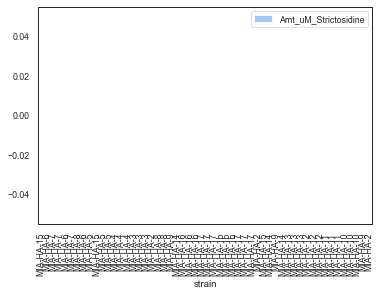

In [29]:
sorted_df = final_processed_data.sort_values(by='Amt_uM_Strictosidine', ascending=False)
yp48 = sorted_df.loc[sorted_df['plate'] == 'yp48']
yp48.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
None

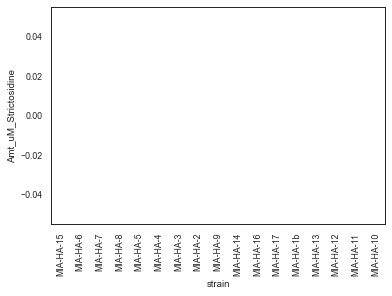

In [30]:
histogram = sns.barplot(data=yp48, x = 'strain', y = 'Amt_uM_Strictosidine')
#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

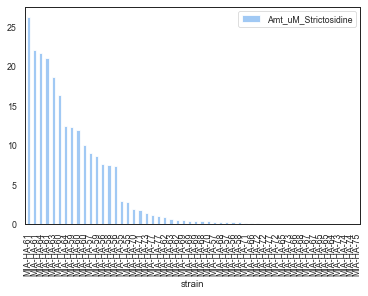

In [31]:
yp49 = sorted_df.loc[sorted_df['plate'] == 'yp49']
yp49.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
#yp49.head(50)
None

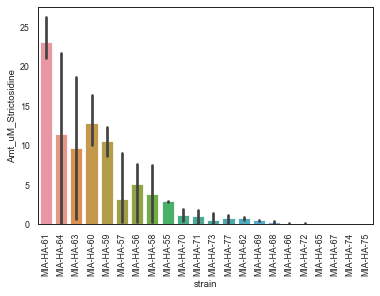

In [32]:
histogram = sns.barplot(data=yp49, x = 'strain', y = 'Amt_uM_Strictosidine')
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

## Conclusion 
1. Bg strain mutated & lost genes 
2. Promoters course large variation - continously low (pRPL15b) doesn't work well for G8H but does for alright for CPR (pURE) 
3. Has strain lost tryptamine synthase or geraniol synthesis genes?


Now doing the same with the other data 

## YP49-51 (library strains)

**Experiment:**

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

**Analytics notes:**

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

In [33]:
# Lets read in all the plates
plate49 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
plate50 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')
plate51 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210603_tmet525_yp51.csv", sep = ',')
rerun = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210608_tmet525_reyp50-51.csv", sep = ',')
plate52 = pd.read_csv("ConStrain_on_google_colab/Data/raw/023_LC-MS/Result_table_210621_tmet531_soren.csv", sep = ',')

# rerun has two columns that are controls that we dont need
rerun = rerun.iloc[2:]

# Stack the DataFrames on top of each other - Lets add the plate 49 from before
results2 = pd.concat([ plate49, rerun,plate50, plate51 ], axis=0)

In [34]:
plate50

,data_file,sample_notes,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Unnamed: 7,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210603_TMET525_018.xms,96WPYP50_A1,NaN,NaN,NaN,54.684,173479.531,NaN,NaN,NaN,NaN,0.103067,1082.758276
1,210603_TMET525_019.xms,96WPYP50_A2,NaN,NaN,NaN,1713.696,252129.906,NaN,NaN,NaN,NaN,3.229915,1573.648146
2,210603_TMET525_020.xms,96WPYP50_A3,NaN,NaN,NaN,198.459,310779.063,NaN,NaN,NaN,NaN,0.374049,1939.702053
3,210603_TMET525_021.xms,96WPYP50_A4,NaN,NaN,NaN,NaN,193592.531,NaN,NaN,NaN,NaN,NaN,1208.291917
4,210603_TMET525_022.xms,96WPYP50_A5,NaN,NaN,NaN,336.890,172544.281,NaN,NaN,NaN,NaN,0.634959,1076.920990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,210603_TMET525_129.xms,96WPYP50_H8,NaN,NaN,NaN,15524.436,127146.813,NaN,NaN,NaN,NaN,29.259920,793.576414
92,210603_TMET525_130.xms,96WPYP50_H9,NaN,1195.809,NaN,18326.477,200282.125,NaN,NaN,3.063192,NaN,34.541111,1250.044470
93,210603_TMET525_131.xms,96WPYP50_H10,NaN,1284.234,NaN,18159.336,200116.313,NaN,NaN,3.289702,NaN,34.226089,1249.009568
94,210603_TMET525_132.xms,96WPYP50_H11,NaN,7965.149,NaN,37619.777,193009.719,NaN,NaN,20.403579,NaN,70.904456,1204.654344


 We filter for rows that has at least one of these compounds: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'

In [35]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results2.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:8], inplace = True, axis = 1)
df_filter
# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

# split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

# Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

#df_filter_plates 
concatenated = concatenated.fillna(0)

253


In [36]:
## fixing the data - ADDING A zero between A1 --> A01
#for index, row in concatenated.iterrows():
#    if len(row['well']) == 2: 
#        letter, number = row['well'][0:1], row['well'][1:2]
#        print(letter, number)
#        row['well'] = str(letter) + '0' + str(number)
#        print(row['well'])


In [37]:
# copying sample to plate
results_copy = concatenated.copy()
results_copy['plate'] = results_copy['sample']
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01,96WP1056
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02,96WP1056
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04,96WP1056
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05,96WP1056
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06,96WP1056
...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H8,96WPYP51
62,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H9,96WPYP51
63,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10,96WPYP51
64,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,96WPYP51


In [38]:
bool_series = results_copy.duplicated()
bool_series

0     False
1     False
3     False
4     False
5     False
      ...  
61    False
62    False
63    False
64    False
65    False
Length: 253, dtype: bool

In [39]:
yp49 = yp49[['data_file','sample_notes','Amt_uM_Loganic acid',
             'Amt_uM_Loganin','Amt_uM_Secologanin','Amt_uM_Strictosidine',
             'Amt_uM_Tryptamine','sample','well','plate']]
yp49.head()

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
69,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,516.8216952,96WP989,C07,yp49
70,210330_TMET494_182.xms,96WP989_P2_C8,0.0,3.72660997,0.0,22.001720,663.9293846,96WP989,C08,yp49
77,210330_TMET494_192.xms,96WP989_P2_D5,0.0,3.676697064,0.0,21.646608,544.414761,96WP989,D05,yp49
71,210330_TMET494_183.xms,96WP989_P2_C9,0.0,3.294851171,0.0,21.050240,342.8212957,96WP989,C09,yp49
75,210330_TMET494_190.xms,96WP989_P2_D3,0.0,2.52681746,0.0,18.588539,520.9128948,96WP989,D03,yp49


In [40]:
results_copy.tail(50)

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
9,210603_TMET525_158.xms,96WPYP51_A10,0.0,0.000000,0.0,0.000000,2106.860879,96WPYP51,A10,96WPYP51
11,210603_TMET525_160.xms,96WPYP51_A12,0.0,0.000000,0.0,0.000000,1804.613775,96WPYP51,A12,96WPYP51
12,210603_TMET525_162.xms,96WPYP51_B1,0.0,0.000000,0.0,0.748062,983.277387,96WPYP51,B1,96WPYP51
13,210603_TMET525_163.xms,96WPYP51_B2,0.0,0.000000,0.0,0.000000,1100.537442,96WPYP51,B2,96WPYP51
14,210603_TMET525_164.xms,96WPYP51_B3,0.0,0.000000,0.0,0.243293,1016.539271,96WPYP51,B3,96WPYP51
15,210603_TMET525_165.xms,96WPYP51_B4,0.0,0.000000,0.0,0.000000,2173.668824,96WPYP51,B4,96WPYP51
16,210603_TMET525_166.xms,96WPYP51_B5,0.0,0.000000,0.0,0.000000,1089.844046,96WPYP51,B5,96WPYP51
17,210603_TMET525_167.xms,96WPYP51_B6,0.0,0.000000,0.0,0.000000,968.913737,96WPYP51,B6,96WPYP51
19,210603_TMET525_169.xms,96WPYP51_B8,0.0,0.000000,0.0,0.000000,1018.162333,96WPYP51,B8,96WPYP51
22,210603_TMET525_172.xms,96WPYP51_B11,0.0,0.000000,0.0,2.350936,2237.832356,96WPYP51,B11,96WPYP51


In [41]:
#pd.set_option('display.max_rows', 1000)


getting the right plate name

In [42]:
results_copy.loc[results_copy['plate'] == '96WP1056', 'plate'] = 'yp49'
results_copy.loc[results_copy['plate'] == '96WPYP50', 'plate'] = 'yp50'
results_copy.loc[results_copy['plate'] == '96WPYP51', 'plate'] = 'yp51'
results_copy.loc[results_copy['plate'] == '96WPYP52', 'plate'] = 'yp52'

# for standardization
results_copy.loc[results_copy['plate'] == '96WPYP49', 'plate'] = 'yp49'

# adding plate 49 
results_copy_wiht_all_lcms = pd.concat([results_copy, yp49])
results_copy_wiht_all_lcms

well_list = results_copy_wiht_all_lcms['well'].to_list()


Changing well names to systematical


In [43]:
well_list = results_copy_wiht_all_lcms['well'].to_list()

new_well_list = []
for i in range(len(well_list)): 
    if len(well_list[i]) == 2:
        
        well = str(well_list[i][0:1])+'0'+str(well_list[i][1:2])
        new_well_list.append(well)
        well= ''
        
    else: 
        new_well_list.append(well_list[i])

results_copy_wiht_all_lcms['well'] = new_well_list

In [44]:
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [45]:
PlateDesign['genotype'].count()

405

# Merge lcms results with Platedesign

In [46]:
lcms_platedesign = pd.merge(results_copy_wiht_all_lcms, PlateDesign, on=['plate','well'])
lcms_platedesign

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H08,yp51,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
303,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H09,yp51,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
304,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.0,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
305,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


Lets normalize the strictosidine productions


In [48]:
control_strict_df = lcms_platedesign.loc[lcms_platedesign['strain'] == 'MIA-CH-A2']
df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
control_strict_df

# the mean from the MIA-CH-A2 strain is ~ 32

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
142,210519_TMET517_128.xms,96WP1056_H07,0.0,5.985699,0.0,31.937737,923.984696,96WP1056,H07,yp49,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
143,210519_TMET517_129.xms,96WP1056_H08,0.0,5.871533,0.0,34.732222,785.546143,96WP1056,H08,yp49,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
144,210519_TMET517_130.xms,96WP1056_H09,0.0,2.170552,0.0,23.996807,604.312676,96WP1056,H09,yp49,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
145,210519_TMET517_131.xms,96WP1056_H10,0.0,4.437494,0.0,26.888967,706.408276,96WP1056,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
245,210603_TMET525_128.xms,96WPYP50_H7,0.0,0.0,0.0,41.072032,1067.329397,96WPYP50,H07,yp50,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
246,210603_TMET525_129.xms,96WPYP50_H8,0.0,0.0,0.0,29.259920,793.576414,96WPYP50,H08,yp50,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
247,210603_TMET525_130.xms,96WPYP50_H9,0.0,3.063192,0.0,34.541111,1250.04447,96WPYP50,H09,yp50,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
248,210603_TMET525_131.xms,96WPYP50_H10,0.0,3.289702,0.0,34.226089,1249.009568,96WPYP50,H10,yp50,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
301,210603_TMET525_259.xms,96WPYP51_H7,0.0,3.067199,0.0,34.865507,1411.407652,96WPYP51,H07,yp51,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
302,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H08,yp51,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


In [49]:
df_mean

32.79678568916667

In [50]:
norm_strict_df = lcms_platedesign.copy()
norm_strict_df['norm_strict_%'] = 0

In [51]:
for index, row in norm_strict_df.iterrows():
    #normalized = round(((row['Amt_uM_Strictosidine']/df_mean)*100),3)
    normalized = ((row['Amt_uM_Strictosidine']/df_mean)*100)

    norm_strict_df.at[index, 'norm_strict_%'] = normalized
norm_strict_df

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.826907
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.229021
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.172318
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.963411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H08,yp51,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,91.141880
303,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H09,yp51,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,83.847083
304,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.0,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,136.142249
305,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,428.003065


In [52]:
# we have to make all the values into floats in order to sort them 
#merged_inner1['Amt_uM_Strictosidine'] = pd.to_numeric(merged_inner1['Amt_uM_Strictosidine'], downcast='float')
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()


# Lets remove Mia-CM3 - the control
#sorted_df = sorted_df[sorted_df['strain'] != 'MIA-CM-3' ]
sorted_df_lcms = sorted_df #[sorted_df['strain'] != 'MIA-CH-A2' ]

sorted_df_lcms

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,305,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,428.003065
1,194,210603_TMET525_059.xms,96WPYP50_D3,0.0,26.235847,0.0,85.210149,2021.748028,96WPYP50,D03,yp50,MIA-HA-33,3.0,SmusG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,259.812502
2,249,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,H11,yp50,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,216.193307
3,229,210603_TMET525_111.xms,96WPYP50_G3,0.0,8.632279,0.0,54.362482,1476.111166,96WPYP50,G03,yp50,MIA-HA-45,3.0,RsepG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,165.755518
4,207,210603_TMET525_087.xms,96WPYP50_E5,0.0,8.00968,0.0,50.194227,1731.472157,96WPYP50,E05,yp50,MIA-HA-38,2.0,SmusG8H CacCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,153.046178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,205,210603_TMET525_085.xms,96WPYP50_E3,0.0,0.0,0.0,0.000000,1938.499214,96WPYP50,E03,yp50,MIA-HA-37,3.0,SmusG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
303,204,210603_TMET525_084.xms,96WPYP50_E2,0.0,0.0,0.0,0.000000,1909.716721,96WPYP50,E02,yp50,MIA-HA-37,2.0,SmusG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
304,203,210603_TMET525_083.xms,96WPYP50_E1,0.0,0.0,0.0,0.000000,1322.633529,96WPYP50,E01,yp50,MIA-HA-37,1.0,SmusG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
305,202,210603_TMET525_068.xms,96WPYP50_D12,0.0,0.0,0.0,0.000000,1579.821396,96WPYP50,D12,yp50,MIA-HA-36,3.0,SmusG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000


In [53]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


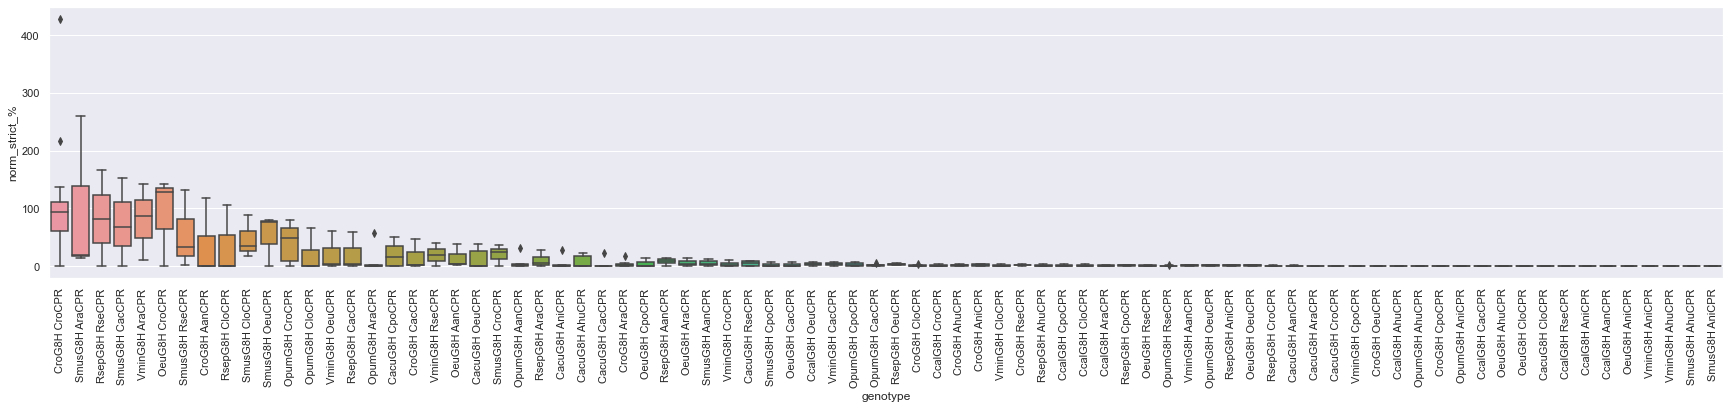

In [54]:
box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df_lcms)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

This plot will take the same genotypes and make error bars. we are not interested in that. see below instesad. 

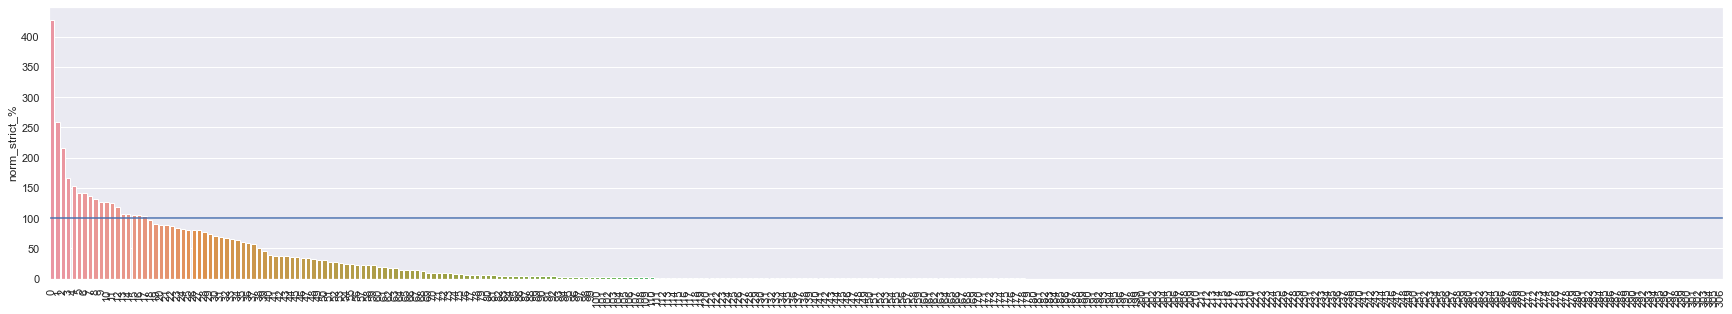

In [55]:
histogram = sns.barplot(data=sorted_df_lcms, x=sorted_df_lcms.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

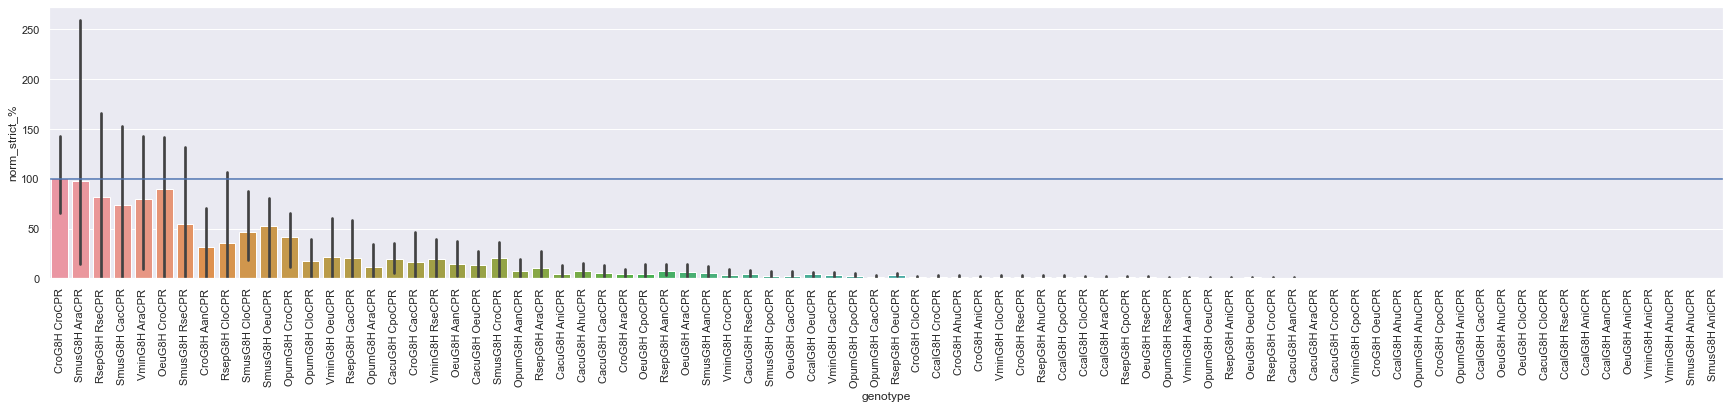

In [56]:
histogram = sns.barplot(data=sorted_df_lcms, x='genotype', y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

# Genotyping

In [57]:
path = 'ConStrain_on_google_colab/Data/raw/10_Sanger_results/'
files = os.listdir(path)
files

['ab1_second_round',
 'PlateReport_yp51_cpr.xls',
 'PlateReport_yp49_cpr.xls',
 'PlateReport_yp50_cpr.xls',
 'PlateReport_yp51_g8h.xls',
 'PlateReport_yp54_cpr_Run1.xlsx',
 'ab1',
 'PlateReport_yp53_g8h_Run1.xlsx',
 'PlateReport_yp54_g8h_Run1.xlsx',
 'PlateReport_yp50_g8h.xls',
 'PlateReport_yp53_cpr_Run1.xlsx',
 'PlateReport_yp49_g8h.xls',
 '.ipynb_checkpoints',
 'sanger_fasta']

In [58]:
yp49_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_cpr.xls')
yp49_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_g8h.xls')
yp50_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_cpr.xls')
yp50_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_g8h.xls')
yp51_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_cpr.xls')
yp51_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_g8h.xls')

# list of all the dataframes
sequencing_plates = [yp49_cpr, yp49_g8h, yp50_cpr, yp50_g8h, yp51_cpr, yp51_g8h]

In [59]:
from constrain.test.genotyping import slicing_and_naming_seq_plates, plat_seq_data_wrangler, plate_AvgQual, split_df_names, concatenating_list_of_dfs

In [60]:
yp49_cpr.head(20)

,Plate: yp49_cpr,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,mean used length: 599 n,NaN,NaN,NaN,NaN,NaN,NaN
1,"used length < 100 n: 33 (34,74%)",NaN,NaN,NaN,NaN,NaN,NaN
2,"used length > 100 < 500 n: 4 (4,21%)",NaN,NaN,NaN,NaN,NaN,NaN
3,"used length > 500 n: 58 (61,05%)",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7,593,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115,144,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6,591,584


### Data wrangling of plateSeq2 excel files

In [61]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

#merged_with_genotyping
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585,yp49,A1
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584,yp49,C1
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045,yp49,D1
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588,yp49,E1
12,6,yp49_cpr_F1_pad_cpr_fw,57.00,1246,21.0,1097.0,1075,yp49,F1
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


In [62]:
## Adding a zero to all the numers before 10
wells = []
for index, row in all_data_frames.iterrows():
    if len(row['well']) == 2: 
        letter, number = row['well'][0:1], row['well'][1:2]
        #print(letter, number)
        row['well'] = letter + '0' + number
        wells.append(row['well'])
    else: 
        wells.append(row['well'])
        
        
all_data_frames['well'] = wells
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585,yp49,A01
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584,yp49,C01
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045,yp49,D01
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588,yp49,E01
12,6,yp49_cpr_F1_pad_cpr_fw,57.00,1246,21.0,1097.0,1075,yp49,F01
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


In [63]:
concating_all_plates_with_bad_reads = concatenating_list_of_dfs(sequencing_plates)
concating_all_plates_with_bad_reads = concating_all_plates_with_bad_reads.replace('n.a.', np.NaN)
concating_all_plates_with_bad_reads

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115.0,144.0,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588
...,...,...,...,...,...,...,...
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968
63,57,yp51_g8h_B12_pad_g8h_fw,18.65,1188,453.0,472.0,18
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947
65,59,yp51_g8h_D12_pad_g8h_fw,28.14,1213,534.0,602.0,67


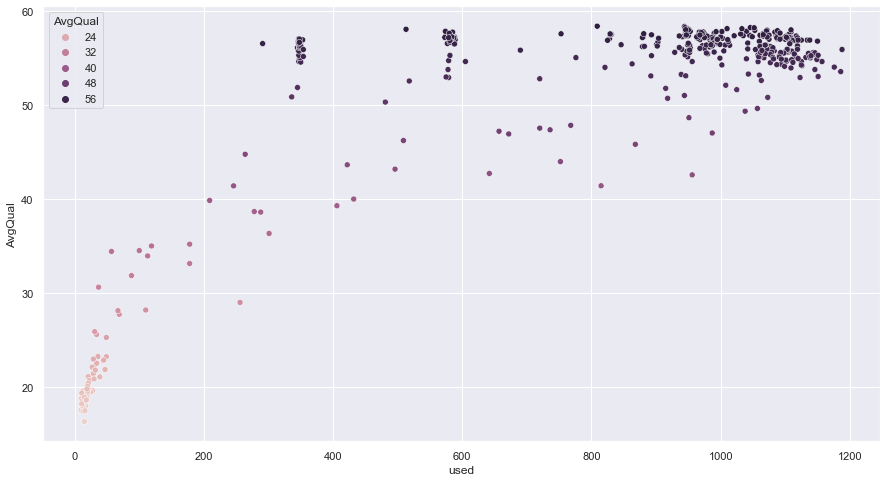

In [64]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=concating_all_plates_with_bad_reads, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

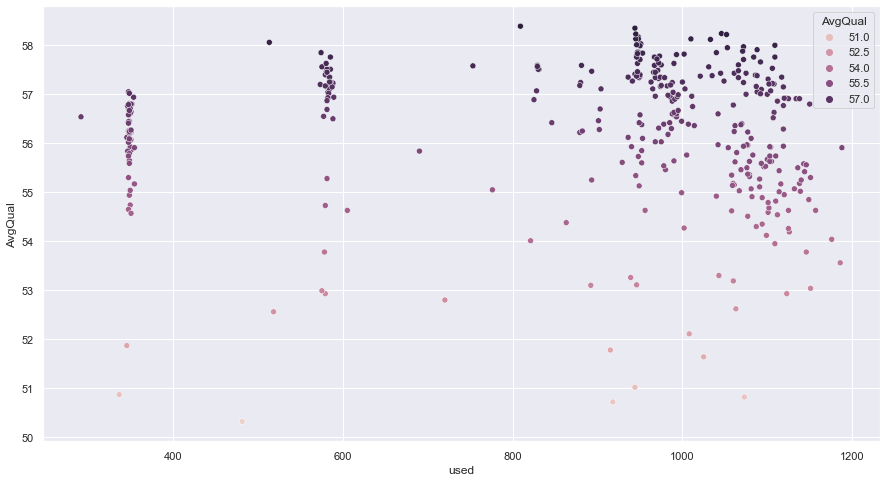

In [65]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=all_data_frames, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

### Infering promoter to sample relationship

#### primers

In [66]:
from Bio import SeqIO

In [67]:
from constrain.lims.csv_database import get_dna_from_box_name
get_dna_from_box_name

<function constrain.lims.csv_database.get_dna_from_box_name(name: str, database_name: str, database_path='../data/csv_database/', genbank_files_path='../data/genbank_files/', genbank=False) -> Bio.SeqRecord.SeqRecord>

In [68]:
pad_pG8H_fw = get_dna_from_box_name('pad_pG8H_fw', 'primer_box', database_path = 'ConStrain_on_google_colab/Data/csv_database/')
pad_pCPR_fw = get_dna_from_box_name('pad_pCPR_fw', 'primer_box', database_path = 'ConStrain_on_google_colab/Data/csv_database/')


In [69]:
primers_for_seq = [pad_pG8H_fw, pad_pCPR_fw]
primers_for_seq

[SeqRecord(seq=Seq('TGCCCATTCGATAAGGCA'), id='10148.0', name='pad_pG8H_fw', description='Stock of primers for G8H-CPR library ', dbxrefs=[]),
 SeqRecord(seq=Seq('GGCGTATGGACCTGTCT'), id='10144.0', name='pad_pCPR_fw', description='Stock of primers for G8H-CPR library ', dbxrefs=[])]

### promoter

In [70]:
pG8H_template_names = ['pCYC1','pENO2','pPCK1','pRPL15B']
pCPR_template_names = ['pCCW12','pMLS1','pTPI1','pURE2']

In [71]:
path = 'ConStrain_on_google_colab/Data/csv_database/'
genbank_path = 'ConStrain_on_google_colab/Data/genbank_files/'


pG8H_sites =[get_dna_from_box_name(name, 'ds_dna_box', database_path = path,genbank = True, genbank_files_path = genbank_path) for name in pG8H_template_names]  
pCPR_sites =[get_dna_from_box_name(name, 'ds_dna_box', database_path = path, genbank = True, genbank_files_path = genbank_path) for name in pCPR_template_names]  


In [72]:
templates = pCPR_sites+pG8H_sites

In [73]:
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='10037', name='pCCW12', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='10038', name='pMLS1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='10039', name='pTPI1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='10040', name='pURE2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='10033', name='pCYC1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='10034', name='pENO2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='10035', name='pPCK1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTG

In [74]:
path = 'ConStrain_on_google_colab/Data/raw/10_Sanger_results/ab1/'
files = os.listdir(path)

reads = []
for read in files:
    if read != '.ipynb_checkpoints': 
        reads.append(SeqIO.read(path+read, 'abi'))


###  New sequencing module

getting the hits that have a proper quality:
    

In [75]:
reads[12]

SeqRecord(seq=Seq('NNNNNNNNNNNGTANTGANNGGCTACCAAAAACGATAATCTCAACTGTAAACAG...NAA'), id='A-352518_F7', name='yp50_cpr_F7_pad_cpr_fw', description='', dbxrefs=[])

## Aligning promoters to reads - infer promoter alignment

In [76]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]
numbers_list = [5, 7,6, 8, 1, 2, 3, 4]

for i in range(len(templates)): 
    templates[i].description = numbers_list[i]
    
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='10037', name='pCCW12', description=5, dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='10038', name='pMLS1', description=7, dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='10039', name='pTPI1', description=6, dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='10040', name='pURE2', description=8, dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='10033', name='pCYC1', description=1, dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='10034', name='pENO2', description=2, dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='10035', name='pPCK1', description=3, dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTGCTGGCCA

In [77]:
# lets limit the alingment to only reads that are of proper quality
sample_names = all_data_frames['Sample-Name'].tolist()
print(len(sample_names))

good_samples = []
for i in range(len(reads)):
    for j in range(len(sample_names)): 
        if reads[i].name == sample_names[j]: 
            good_samples.append(reads[i])
            
len(good_samples)


357


355

In [78]:
from constrain.test.genotyping import pairwise_alignment_of_templates

In [79]:
len(templates)

8

## Aligning the reads to the templates

In [80]:
%%time

df_alignment = pairwise_alignment_of_templates(good_samples,templates, primers_for_seq)

df_alignment

CPU times: user 13min 24s, sys: 2.88 s, total: 13min 27s
Wall time: 13min 29s


,Sample-Name,inf_part_name,align_score,inf_part_number
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7
...,...,...,...,...
350,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8
351,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7
352,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
353,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2


In [81]:
col_list =  list(df_alignment["align_score"])
print(col_list)

[751.0, 973.0, 932.0, 964.0, 973.0, 509.0, 966.0, 892.0, 968.0, 970.0, 518.0, 951.0, 525.0, 951.0, 503.0, 967.0, 504.0, 968.0, 955.0, 966.0, 526.0, 972.0, 969.0, 970.0, 954.0, 969.0, 539.0, 959.0, 972.0, 972.0, 466.0, 949.0, 940.0, 954.0, 968.0, 957.0, 756.0, 518.0, 968.0, 933.0, 955.0, 544.0, 836.0, 955.0, 955.0, 968.0, 856.0, 500.0, 501.0, 974.0, 912.0, 793.0, 777.0, 785.0, 948.0, 969.0, 967.0, 950.0, 936.0, 955.0, 970.0, 948.0, 532.0, 969.0, 680.0, 531.0, 838.0, 971.0, 967.0, 955.0, 948.0, 973.0, 527.0, 962.0, 955.0, 954.0, 961.0, 969.0, 518.0, 751.0, 956.0, 951.0, 971.0, 969.0, 831.0, 970.0, 970.0, 977.0, 971.0, 970.0, 954.0, 959.0, 949.0, 964.0, 953.0, 850.0, 969.0, 971.0, 516.0, 972.0, 956.0, 969.0, 531.0, 964.0, 936.0, 793.0, 959.0, 955.0, 518.0, 950.0, 529.0, 953.0, 964.0, 926.0, 734.0, 949.0, 973.0, 968.0, 972.0, 972.0, 485.0, 955.0, 810.0, 974.0, 794.0, 951.0, 973.0, 512.0, 964.0, 748.0, 954.0, 955.0, 953.0, 544.0, 651.0, 911.0, 970.0, 970.0, 525.0, 529.0, 967.0, 951.0, 780.0

In [82]:
minvalue = df_alignment['align_score'].min()
minvalue

466.0

In [83]:
df_align_sort = df_alignment.sort_values(['Sample-Name'])
df_align_sort

,Sample-Name,inf_part_name,align_score,inf_part_number
146,yp49_cpr_A12_pad_cpr_fw,pMLS1,965.0,7
331,yp49_cpr_A1_pad_cpr_fw,pCCW12,833.0,5
234,yp49_cpr_A2_pad_cpr_fw,pURE2,972.0,8
224,yp49_cpr_A3_pad_cpr_fw,pURE2,973.0,8
352,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
...,...,...,...,...
78,yp51_g8h_E2_pad_g8h_fw,pCYC1,518.0,1
37,yp51_g8h_E4_pad_g8h_fw,pCYC1,518.0,1
120,yp51_g8h_E7_pad_g8h_fw,pCYC1,485.0,1
115,yp51_g8h_E8_pad_g8h_fw,pRPL15B,949.0,4


In [84]:
df_alignment['position'] = ''
position = []
for index, row in df_alignment.iterrows():
    split = str(row['Sample-Name'].split("_")[1])
    if split == 'g8h': 
        position.append(1)
    if split == 'cpr': 
        position.append(2)

df_alignment['position'] = position
    

grouping the positions

In [85]:
grouped = df_alignment.groupby(df_alignment.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

g8h_df

,Sample-Name,inf_part_name,align_score,inf_part_number,position
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3,1
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2,1
5,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1,1
6,yp49_g8h_C2_pad_g8h_fw,pPCK1,966.0,3,1
10,yp49_g8h_G12_pad_g8h_fw,pCYC1,518.0,1,1
...,...,...,...,...,...
347,yp51_g8h_A6_pad_g8h_fw,pCYC1,503.0,1,1
348,yp50_g8h_B7_pad_g8h_fw,pPCK1,961.0,3,1
349,yp50_g8h_C2_pad_g8h_fw,pRPL15B,955.0,4,1
353,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2,1


In [86]:
cpr_df

,Sample-Name,inf_part_name,align_score,inf_part_number,position
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5,2
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7,2
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7,2
7,yp50_cpr_F7_pad_cpr_fw,pCCW12,892.0,5,2
8,yp50_cpr_G2_pad_cpr_fw,pURE2,968.0,8,2
...,...,...,...,...,...
345,yp49_cpr_F7_pad_cpr_fw,pURE2,973.0,8,2
346,yp49_cpr_G12_pad_cpr_fw,pMLS1,966.0,7,2
350,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8,2
351,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7,2


In [87]:
# lets merge the quality dataframe
infered_promoters_df = pd.merge(all_data_frames, df_alignment, left_on=['Sample-Name'], right_on = ['Sample-Name'])

In [88]:
infered_promoters_df

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well,inf_part_name,align_score,inf_part_number,position
0,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585,yp49,A01,pCCW12,833.0,5,2
1,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584,yp49,C01,pCCW12,793.0,5,2
2,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045,yp49,D01,pMLS1,972.0,7,2
3,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588,yp49,E01,pCCW12,836.0,5,2
4,6,yp49_cpr_F1_pad_cpr_fw,57.00,1246,21.0,1097.0,1075,yp49,F01,pTPI1,969.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11,pRPL15B,952.0,4,1
351,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11,pPCK1,970.0,3,1
352,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12,pRPL15B,951.0,4,1
353,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12,pPCK1,960.0,3,1


In [89]:
infered_promoters_df = infered_promoters_df[["plate", "well", "inf_part_number", "position"]]
infered_promoters_df

,plate,well,inf_part_number,position
0,yp49,A01,5,2
1,yp49,C01,5,2
2,yp49,D01,7,2
3,yp49,E01,5,2
4,yp49,F01,6,2
...,...,...,...,...
350,yp51,D11,4,1
351,yp51,E11,3,1
352,yp51,A12,4,1
353,yp51,C12,3,1


In [90]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_part_number"]]
cpr_df = cpr_df[["plate", "well", "inf_part_number"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, left_on=['plate','well' ], right_on = ['plate','well'])
promoter_to_well

,plate,well,inf_promoter1,inf_promoter2
0,yp49,A01,2,5
1,yp49,C01,2,5
2,yp49,E01,1,5
3,yp49,F01,3,6
4,yp49,G01,2,7
...,...,...,...,...
124,yp51,D11,4,7
125,yp51,E11,3,7
126,yp51,A12,4,7
127,yp51,C12,3,7


In [91]:
print(len(g8h_df))
print(len(cpr_df))

205
150


Sanity check - did we get the correct promoters in each well? 


In [92]:
for index, row in promoter_to_well.iterrows():
    if int(row['inf_promoter1']) > 4:
        print('SOMTHING WRONG WITH G8H', row['plate'], row['well'], index)
    if int(row['inf_promoter2']) < 5:
            print('SOMTHING WRONG WITH CPR', row['plate'], row['well'], index)
print('SUCCESSSSS')


SUCCESSSSS


## Plate reports

## Combine data


In [93]:
promoter_genotype_relationship = pd.merge(promoter_to_well, sorted_df_lcms, on=['plate','well' ])
len(promoter_genotype_relationship)

157

In [94]:
promoter_genotype_relationship

,plate,well,inf_promoter1,inf_promoter2,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,strain,col_no,genotype,medium,norm_strict_%
0,yp49,A01,2,5,0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.826907
1,yp49,C01,2,5,32,210519_TMET517_044.xms,96WP1056_C01,0.0,0.0,0.0,0.149626,853.179516,96WP1056,MIA-HA-59,1.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.456221
2,yp49,E01,1,5,76,210519_TMET517_083.xms,96WP1056_E01,0.0,0.0,0.0,0.096246,766.625577,96WP1056,MIA-HA-67,1.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.293460
3,yp49,F01,3,6,98,210519_TMET517_096.xms,96WP1056_F01,0.0,1.35041,0.0,7.365141,621.345993,96WP1056,MIA-HA-71,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,22.456900
4,yp49,G01,2,7,120,210519_TMET517_109.xms,96WP1056_G01,0.0,0.0,0.0,1.112404,722.117732,96WP1056,MIA-HA-75,1.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,3.391807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,yp51,D11,4,7,288,210603_TMET525_198.xms,96WPYP51_D11,0.0,0.0,0.0,0.000000,1133.414992,96WPYP51,MIA-HA-96,2.0,CcalG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
153,yp51,E11,3,7,299,210603_TMET525_224.xms,96WPYP51_E11,0.0,0.0,0.0,0.000000,1567.396099,96WPYP51,MIA-HA-100,2.0,CcalG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
154,yp51,A12,4,7,258,210603_TMET525_160.xms,96WPYP51_A12,0.0,0.0,0.0,0.000000,1804.613775,96WPYP51,MIA-HA-84,3.0,OeuG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000
155,yp51,C12,3,7,278,210603_TMET525_186.xms,96WPYP51_C12,0.0,0.0,0.0,0.000000,1130.602453,96WPYP51,MIA-HA-92,3.0,CcalG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000


In [95]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


g8h_genotype = []
cpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in promoter_genotype_relationship.iterrows():
    g8h_geno = str(row['genotype'].split(" ")[0])
    cpr_geno = str(row['genotype'].split(" ")[1])
    
    
    g8h_pos = g8h_list_of_index.index(str(row['genotype'].split(" ")[0]))+1
    cpr_pos = cpr_list_of_index.index(str(row['genotype'].split(" ")[1]))+1

    
    g8h_genotype.append(g8h_pos)
    cpr_genotype.append(cpr_pos)
    
promoter_genotype_relationship['G8H'] = g8h_genotype
promoter_genotype_relationship['CPR'] = cpr_genotype

In [96]:
promoter_genotype_relationship

,plate,well,inf_promoter1,inf_promoter2,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,strain,col_no,genotype,medium,norm_strict_%,G8H,CPR
0,yp49,A01,2,5,0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.826907,1,1
1,yp49,C01,2,5,32,210519_TMET517_044.xms,96WP1056_C01,0.0,0.0,0.0,0.149626,853.179516,96WP1056,MIA-HA-59,1.0,CacuG8H OeuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.456221,1,9
2,yp49,E01,1,5,76,210519_TMET517_083.xms,96WP1056_E01,0.0,0.0,0.0,0.096246,766.625577,96WP1056,MIA-HA-67,1.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.293460,2,7
3,yp49,F01,3,6,98,210519_TMET517_096.xms,96WP1056_F01,0.0,1.35041,0.0,7.365141,621.345993,96WP1056,MIA-HA-71,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,22.456900,3,1
4,yp49,G01,2,7,120,210519_TMET517_109.xms,96WP1056_G01,0.0,0.0,0.0,1.112404,722.117732,96WP1056,MIA-HA-75,1.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,3.391807,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,yp51,D11,4,7,288,210603_TMET525_198.xms,96WPYP51_D11,0.0,0.0,0.0,0.000000,1133.414992,96WPYP51,MIA-HA-96,2.0,CcalG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000,8,6
153,yp51,E11,3,7,299,210603_TMET525_224.xms,96WPYP51_E11,0.0,0.0,0.0,0.000000,1567.396099,96WPYP51,MIA-HA-100,2.0,CcalG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000,8,10
154,yp51,A12,4,7,258,210603_TMET525_160.xms,96WPYP51_A12,0.0,0.0,0.0,0.000000,1804.613775,96WPYP51,MIA-HA-84,3.0,OeuG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000,7,4
155,yp51,C12,3,7,278,210603_TMET525_186.xms,96WPYP51_C12,0.0,0.0,0.0,0.000000,1130.602453,96WPYP51,MIA-HA-92,3.0,CcalG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000000,8,2


make new dataframe of promoters: 


plate


In [97]:
promoter_genotype_relationship = promoter_genotype_relationship[['plate', 'well', 'G8H','inf_promoter1', 'inf_promoter2', 'CPR',  'Amt_uM_Strictosidine', 'norm_strict_%']]
promoter_genotype_relationship

,plate,well,G8H,inf_promoter1,inf_promoter2,CPR,Amt_uM_Strictosidine,norm_strict_%
0,yp49,A01,1,2,5,1,0.271199,0.826907
1,yp49,C01,1,2,5,9,0.149626,0.456221
2,yp49,E01,2,1,5,7,0.096246,0.293460
3,yp49,F01,3,3,6,1,7.365141,22.456900
4,yp49,G01,3,2,7,5,1.112404,3.391807
...,...,...,...,...,...,...,...,...
152,yp51,D11,8,4,7,6,0.000000,0.000000
153,yp51,E11,8,3,7,10,0.000000,0.000000
154,yp51,A12,7,4,7,4,0.000000,0.000000
155,yp51,C12,8,3,7,2,0.000000,0.000000


In [98]:
promoter_genotype_relationship.columns = ['plate', 'well', '0','1', '2', '3',  'Amt_uM_Strictosidine', 'Amt_norm']
promoter_genotype_relationship

,plate,well,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp49,A01,1,2,5,1,0.271199,0.826907
1,yp49,C01,1,2,5,9,0.149626,0.456221
2,yp49,E01,2,1,5,7,0.096246,0.293460
3,yp49,F01,3,3,6,1,7.365141,22.456900
4,yp49,G01,3,2,7,5,1.112404,3.391807
...,...,...,...,...,...,...,...,...
152,yp51,D11,8,4,7,6,0.000000,0.000000
153,yp51,E11,8,3,7,10,0.000000,0.000000
154,yp51,A12,7,4,7,4,0.000000,0.000000
155,yp51,C12,8,3,7,2,0.000000,0.000000


In [116]:
promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_7055/1158976612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']


In [117]:
promoter_genotype_relationship

,plate,well,0,1,2,3,Amt_uM_Strictosidine,Amt_norm,Line_name
0,yp49,A01,1,2,5,1,0.271199,0.826907,yp49_A01
1,yp49,C01,1,2,5,9,0.149626,0.456221,yp49_C01
2,yp49,E01,2,1,5,7,0.096246,0.293460,yp49_E01
3,yp49,F01,3,3,6,1,7.365141,22.456900,yp49_F01
4,yp49,G01,3,2,7,5,1.112404,3.391807,yp49_G01
...,...,...,...,...,...,...,...,...,...
152,yp51,D11,8,4,7,6,0.000000,0.000000,yp51_D11
153,yp51,E11,8,3,7,10,0.000000,0.000000,yp51_E11
154,yp51,A12,7,4,7,4,0.000000,0.000000,yp51_A12
155,yp51,C12,8,3,7,2,0.000000,0.000000,yp51_C12


Make the final dataframe and sorting by Line_name

In [118]:
promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line_name', '0','1', '2', '3', 'Amt_norm']].sort_values('Line_name')

In [142]:
promoter_genotype_relationship_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.826907
6,yp49_A02,1,3,8,1,0.229021
39,yp49_A06,1,2,6,2,0.963411
44,yp49_A07,1,1,5,3,0.834021
51,yp49_A08,1,1,8,3,0.190162
...,...,...,...,...,...,...
135,yp51_E04,8,1,7,8,0.162008
144,yp51_E07,8,1,8,9,6.817572
146,yp51_E08,8,4,5,9,0.670433
153,yp51_E11,8,3,7,10,0.000000


In [143]:
promoter_genotype_relationship_for_ml.to_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_1st_iteration_LL.csv')

In [146]:
input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_1st_iteration_LL.csv', index_col=None)
input_for_ml

,Unnamed: 0,Line_name,0,1,2,3,Amt_norm
0,0,yp49_A01,1,2,5,1,0.826907
1,6,yp49_A02,1,3,8,1,0.229021
2,39,yp49_A06,1,2,6,2,0.963411
3,44,yp49_A07,1,1,5,3,0.834021
4,51,yp49_A08,1,1,8,3,0.190162
...,...,...,...,...,...,...,...
152,135,yp51_E04,8,1,7,8,0.162008
153,144,yp51_E07,8,1,8,9,6.817572
154,146,yp51_E08,8,4,5,9,0.670433
155,153,yp51_E11,8,3,7,10,0.000000


## Now for plotting:

In [147]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]

promoter_dict = {i+1:list_of_promoters[i]for i in range(len(list_of_promoters))}
promoter_dict

{1: 'pCYC1',
 2: 'pENO2',
 3: 'pPCK1',
 4: 'pRPL15B',
 5: 'pCCW12',
 6: 'pTPI1',
 7: 'pMLS1',
 8: 'pURE2'}

In [148]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]

pg8h_list_of_index = ['pCYC1', 'pENO2']
pcpr_list_of_index = ['pCCW12', 'pTPI1'] 



g8h_genotype = []
cpr_genotype = []
pg8h_genotype = []
pcpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in input_for_ml.iterrows():
    # homologs
    g8h_name = g8h_list_of_index[int(row['0']-1)]
    cpr_name = cpr_list_of_index[int(row['3']-1)]
    
    # promoters
    pg8h_name =promoter_dict[row['1']]
    pcpr_name = promoter_dict[row['2']]
    
    
    # save the genotypes
    g8h_genotype.append(g8h_name)
    cpr_genotype.append(cpr_name)
    pg8h_genotype.append(pg8h_name)
    pcpr_genotype.append(pcpr_name)

input_for_ml['G8H'] = g8h_genotype
input_for_ml['CPR'] = cpr_genotype
input_for_ml['pG8H'] = pg8h_genotype
input_for_ml['pCPR'] = pcpr_genotype

In [149]:
for_plotting_input_for_ml = input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']]
for_plotting_input_for_ml

,G8H,pG8H,pCPR,CPR
0,CacuG8H,pENO2,pCCW12,CroCPR
1,CacuG8H,pPCK1,pURE2,CroCPR
2,CacuG8H,pENO2,pTPI1,AanCPR
3,CacuG8H,pCYC1,pCCW12,AraCPR
4,CacuG8H,pCYC1,pURE2,AraCPR
...,...,...,...,...
152,CcalG8H,pCYC1,pMLS1,CacCPR
153,CcalG8H,pCYC1,pURE2,OeuCPR
154,CcalG8H,pRPL15B,pCCW12,OeuCPR
155,CcalG8H,pPCK1,pMLS1,CpoCPR


In [154]:
simple_plotting = for_plotting_input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']]
simple_plotting

,G8H,pG8H,pCPR,CPR
0,CacuG8H,pENO2,pCCW12,CroCPR
1,CacuG8H,pPCK1,pURE2,CroCPR
2,CacuG8H,pENO2,pTPI1,AanCPR
3,CacuG8H,pCYC1,pCCW12,AraCPR
4,CacuG8H,pCYC1,pURE2,AraCPR
...,...,...,...,...
152,CcalG8H,pCYC1,pMLS1,CacCPR
153,CcalG8H,pCYC1,pURE2,OeuCPR
154,CcalG8H,pRPL15B,pCCW12,OeuCPR
155,CcalG8H,pPCK1,pMLS1,CpoCPR


In [155]:
g8h_counts = pd.DataFrame(for_plotting_input_for_ml["G8H"].value_counts())
pg8h_counts = pd.DataFrame(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = pd.DataFrame(for_plotting_input_for_ml["pCPR"].value_counts())
cpr_counts = pd.DataFrame(for_plotting_input_for_ml["CPR"].value_counts())

all_counts = pd.concat([g8h_counts,pg8h_counts,pcpr_counts, cpr_counts ])
all_counts

,G8H,pG8H,pCPR,CPR
CacuG8H,28.0,NaN,NaN,NaN
CroG8H,27.0,NaN,NaN,NaN
OpumG8H,23.0,NaN,NaN,NaN
VminG8H,18.0,NaN,NaN,NaN
CcalG8H,17.0,NaN,NaN,NaN
RsepG8H,15.0,NaN,NaN,NaN
OeuG8H,15.0,NaN,NaN,NaN
SmusG8H,14.0,NaN,NaN,NaN
pRPL15B,NaN,45.0,NaN,NaN
pPCK1,NaN,44.0,NaN,NaN


In [156]:
cpr_counts

,CPR
RseCPR,19
CroCPR,18
AanCPR,17
AhuCPR,17
CacCPR,17
OeuCPR,16
CloCPR,16
AraCPR,13
CpoCPR,13
AniCPR,11


In [157]:
g8h_counts = dict(for_plotting_input_for_ml["G8H"].value_counts())
pg8h_counts = dict(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = dict(for_plotting_input_for_ml["pCPR"].value_counts())
cpr_counts = dict(for_plotting_input_for_ml["CPR"].value_counts())

all_counts_as_list = [g8h_counts,pg8h_counts,pcpr_counts,cpr_counts]
all_counts_as_list

[{'CacuG8H': 28,
  'CroG8H': 27,
  'OpumG8H': 23,
  'VminG8H': 18,
  'CcalG8H': 17,
  'RsepG8H': 15,
  'OeuG8H': 15,
  'SmusG8H': 14},
 {'pRPL15B': 45, 'pPCK1': 44, 'pCYC1': 38, 'pENO2': 30},
 {'pURE2': 46, 'pCCW12': 42, 'pTPI1': 35, 'pMLS1': 34},
 {'RseCPR': 19,
  'CroCPR': 18,
  'AanCPR': 17,
  'AhuCPR': 17,
  'CacCPR': 17,
  'OeuCPR': 16,
  'CloCPR': 16,
  'AraCPR': 13,
  'CpoCPR': 13,
  'AniCPR': 11}]

In [158]:
def counting_occurences(data_with_occurences:dict): 
    columns = []
    data = []
    for key,value in data_with_occurences.items(): 

        values = cpr_counts.values()
        total = sum(values)

        data.append(value/total)
        columns.append(key)
        
    return data, columns

In [159]:
# Occurences
names_list = ['G8H', 'pG8H', 'pCPR', 'CPR']

dataframes = []
for i in range(len(all_counts_as_list)): 
    data, columns = counting_occurences(all_counts_as_list[i])

    dataframes.append(pd.DataFrame(data, columns=[names_list[i]], index=columns))

    print(data, columns)

[0.17834394904458598, 0.17197452229299362, 0.1464968152866242, 0.11464968152866242, 0.10828025477707007, 0.09554140127388536, 0.09554140127388536, 0.08917197452229299] ['CacuG8H', 'CroG8H', 'OpumG8H', 'VminG8H', 'CcalG8H', 'RsepG8H', 'OeuG8H', 'SmusG8H']
[0.28662420382165604, 0.2802547770700637, 0.24203821656050956, 0.1910828025477707] ['pRPL15B', 'pPCK1', 'pCYC1', 'pENO2']
[0.2929936305732484, 0.267515923566879, 0.2229299363057325, 0.21656050955414013] ['pURE2', 'pCCW12', 'pTPI1', 'pMLS1']
[0.12101910828025478, 0.11464968152866242, 0.10828025477707007, 0.10828025477707007, 0.10828025477707007, 0.10191082802547771, 0.10191082802547771, 0.08280254777070063, 0.08280254777070063, 0.07006369426751592] ['RseCPR', 'CroCPR', 'AanCPR', 'AhuCPR', 'CacCPR', 'OeuCPR', 'CloCPR', 'AraCPR', 'CpoCPR', 'AniCPR']


In [160]:
all_df_for_stacked_plot = pd.concat(dataframes)
all_df_for_stacked_plot = all_df_for_stacked_plot.T
all_df_for_stacked_plot

,CacuG8H,CroG8H,OpumG8H,VminG8H,CcalG8H,RsepG8H,OeuG8H,SmusG8H,pRPL15B,pPCK1,...,RseCPR,CroCPR,AanCPR,AhuCPR,CacCPR,OeuCPR,CloCPR,AraCPR,CpoCPR,AniCPR
G8H,0.178344,0.171975,0.146497,0.11465,0.10828,0.095541,0.095541,0.089172,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pG8H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286624,0.280255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pCPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.121019,0.11465,0.10828,0.10828,0.10828,0.101911,0.101911,0.082803,0.082803,0.070064


Text(0, 0.5, 'Percentage of occurence')

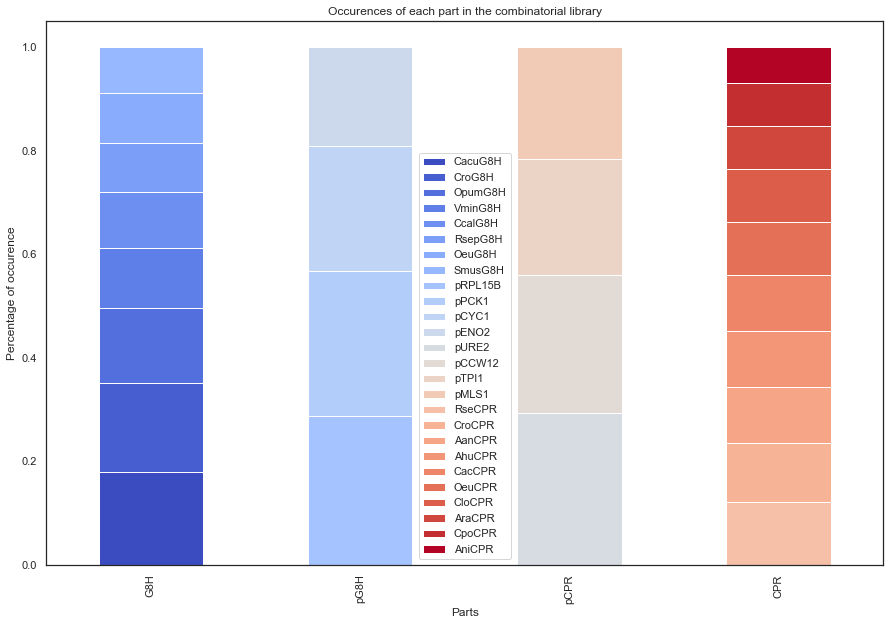

In [162]:
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
sns.color_palette("icefire", as_cmap=True)


all_df_for_stacked_plot.plot( kind="bar",stacked = True,  figsize=(15, 10), cmap="coolwarm")
# Add Title and Labels
plt.title('Occurences of each part in the combinatorial library')
plt.xlabel('Parts')
plt.ylabel('Percentage of occurence')